In [6]:
import csv

# 데이터 파일 열기 및 읽기
f1=open('LOCAL_PEOPLE_DONG_202205.csv', encoding='utf8')
data=csv.reader(f1)
next(data) #헤더 제거
data=list(data)

# 행정동 코드 파일 열기 및 읽기
f2=open('dong_code.csv', encoding='utf8')
code_data=csv.reader(f2)
next(code_data) #헤더 두 개 제거
next(code_data)
code_data=list(code_data)

# 데이터 파일 (문자열->정수, 실수) 변환
for row in data:
    for i in range(1,32):
        if i<=2: # 인덱스가 2 이하인 경우 정수형으로 변환
            row[i] = int(row[i])
        else: # 인덱스가 2 초과인 경우 실수형으로 변환
            row[i] = float(row[i])
print(data[0])

# 행정동 코드 파일 (문자열->정수) 변환
for row in code_data:
    row[1] = int(row[1])
print(code_data[0])

# 행정동 이름과 행정동 코드 연결
dong_name = input('핫플레이스가 위치한 행정동을 입력하세요 >> ')
for row in code_data:
    if row[-1] == dong_name:   # 입력받은 행정동이 코드 파일에 있으면
        dong_code = row[1]     # 해당 동의 코드를 변수에 저장
print(dong_name, '(', dong_code, ')을 분석합니다!')


['20220501', 0, 11110550, 15391.9626, 440.5974, 341.6334, 532.5806, 421.9936, 420.163, 393.9117, 491.7774, 583.1512, 639.3547, 628.5863, 583.5106, 475.8616, 338.0391, 812.4296, 399.8296, 284.7709, 443.906, 458.4572, 421.2574, 394.5753, 616.7841, 618.3331, 858.9796, 608.9686, 720.9171, 655.3401, 447.0748, 1359.1787, '']
['1101053', 11110530, '서울', '종로구', '사직동']
핫플레이스가 위치한 행정동을 입력하세요 >> 압구정동
압구정동 ( 11680545 )을 분석합니다!


['20220501', 0, 11110550, 15391.9626, 440.5974, 341.6334, 532.5806, 421.9936, 420.163, 393.9117, 491.7774, 583.1512, 639.3547, 628.5863, 583.5106, 475.8616, 338.0391, 812.4296, 399.8296, 284.7709, 443.906, 458.4572, 421.2574, 394.5753, 616.7841, 618.3331, 858.9796, 608.9686, 720.9171, 655.3401, 447.0748, 1359.1787, '']
['1101053', 11110530, '서울', '종로구', '사직동']
핫플레이스가 위치한 행정동을 입력하세요 >> 압구정동
압구정동 ( 11680545 )을 분석합니다!


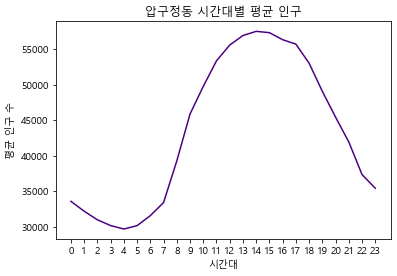

In [7]:
import csv
import matplotlib.pyplot as plt

# 데이터 파일 열기 및 읽기
f1=open('LOCAL_PEOPLE_DONG_202205.csv', encoding='utf8')
data=csv.reader(f1)
next(data) #헤더 제거
data=list(data)

# 행정동 코드 파일 열기 및 읽기
f2=open('dong_code.csv', encoding='utf8')
code_data=csv.reader(f2)
next(code_data) #헤더 두 개 제거
next(code_data)
code_data=list(code_data)

# 데이터 파일 (문자열->정수, 실수) 변환
for row in data:
    for i in range(1,32):
        if i<=2: # 인덱스가 2 이하인 경우 정수형으로 변환
            row[i] = int(row[i])
        else: # 인덱스가 2 초과인 경우 실수형으로 변환
            row[i] = float(row[i])

# 행정동 코드 파일 (문자열->정수) 변환
for row in code_data:
    row[1] = int(row[1])

# 행정동 이름과 행정동 코드 연결
dong_name = input('핫플레이스가 위치한 행정동을 입력하세요 >> ')
for row in code_data:
    if row[-1] == dong_name:   # 입력받은 행정동이 코드 파일에 있으면
        dong_code = row[1]     # 해당 동의 코드를 변수에 저장
print(dong_name, '(', dong_code, ')을 분석합니다!')

# 시간대 별 평균 생활인구 수 계산
pop = [0 for i in range(24)]  # 인구 수 리스트 0으로 초기화
for row in data:
    if row[2] == dong_code:
        time, p = row[1], row[3]  # time:시간대 / p:총 생활인구 수
        pop[time] += p            # 각 시간대 별로 생활인구 수가 저장
pop = [p/31 for p in pop]        # pop을 일수로 나누어 평균 인구 만들기

# 그래프 작성
plt.rc('font', family='Malgun Gothic')
plt.title(dong_name + ' 시간대별 평균 인구')
plt.plot(range(24), pop, color='indigo')
plt.xticks(range(24), range(24))  # X축 눈금
plt.xlabel('시간대')
plt.ylabel('평균 인구 수')
plt.show()

핫플레이스가 위치한 행정동을 입력하세요 >> 압구정동
압구정동 ( 11680545 )을 분석합니다!


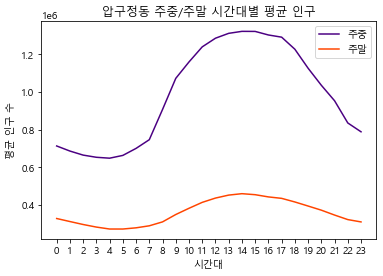

In [9]:
import csv
import matplotlib.pyplot as plt
import datetime

# 데이터 파일 열기 및 읽기
f1=open('LOCAL_PEOPLE_DONG_202205.csv', encoding='utf8')
data=csv.reader(f1)
next(data) #헤더 제거
data=list(data)

# 행정동 코드 파일 열기 및 읽기
f2=open('dong_code.csv', encoding='utf8')
code_data=csv.reader(f2)
next(code_data) #헤더 두 개 제거
next(code_data)
code_data=list(code_data)

# 데이터 파일 (문자열->정수, 실수) 변환
for row in data:
    for i in range(1,32):
        if i<=2: # 인덱스가 2 이하인 경우 정수형으로 변환
            row[i] = int(row[i])
        else: # 인덱스가 2 초과인 경우 실수형으로 변환
            row[i] = float(row[i])

# 행정동 코드 파일 (문자열->정수) 변환
for row in code_data:
    row[1] = int(row[1])

# 행정동 이름과 행정동 코드 연결
dong_name = input('핫플레이스가 위치한 행정동을 입력하세요 >> ')
for row in code_data:
    if row[-1] == dong_name:   # 입력받은 행정동이 코드 파일에 있으면
        dong_code = row[1]     # 해당 동의 코드를 변수에 저장
print(dong_name, '(', dong_code, ')을 분석합니다!')

# 날짜 주중, 주말로 분리
weekday = [0 for i in range(24)]
weekend = [0 for i in range(24)]

for row in data:
    if row[2] == dong_code:
        time, p = row[1], row[3]   # time:시간대 / p:총 생활인구 수
        year, mon, day = int(row[0][:4]), int(row[0][4:6]), int(row[0][6:]) # yyyymmdd -> yyyy mm dd 분리
        
        num = datetime.date(year,mon,day).weekday()  #datetime.date.weekday()를 사용하여 주중, 주말 구분
        if num < 5:     # 결과 0 ~ 4는 주중
            weekday[time] += p  # 주중의 시간대 별 총 생활인구 수 계산
        else:           # 결과 5 ~ 6은 주말
            weekend[time] += p  # 주말의 시간대 별 총 생활인구 수 계산
"""           
# 2022년 5월의 주중/주말 일수 구하기
weekday_cnt, weekend_cnt = 0, 0
for i in range(1,32):
    if datetime.date(2022, 5, i).weekday() < 5:
        weekday_cnt += 1
    else:
        weekend_cnt += 1
print('2022년 5월의 주중 일수 =', weekday_cnt, '주말 일수 =', weekend_cnt)
"""
# 그래프 작성
plt.rc('font',family='Malgun Gothic')
plt.title(dong_name + ' 주중/주말 시간대별 평균 인구')
plt.plot(weekday, color='indigo', label='주중')
plt.plot(weekend, color='orangered', label='주말')
plt.legend()
plt.xlabel('시간대')
plt.ylabel('평균 인구 수')
plt.xticks(range(24), range(24)) # X축 눈금
plt.show()

핫플레이스가 위치한 행정동을 입력하세요 >> 압구정동
압구정동 ( 11680545 )을 분석합니다!


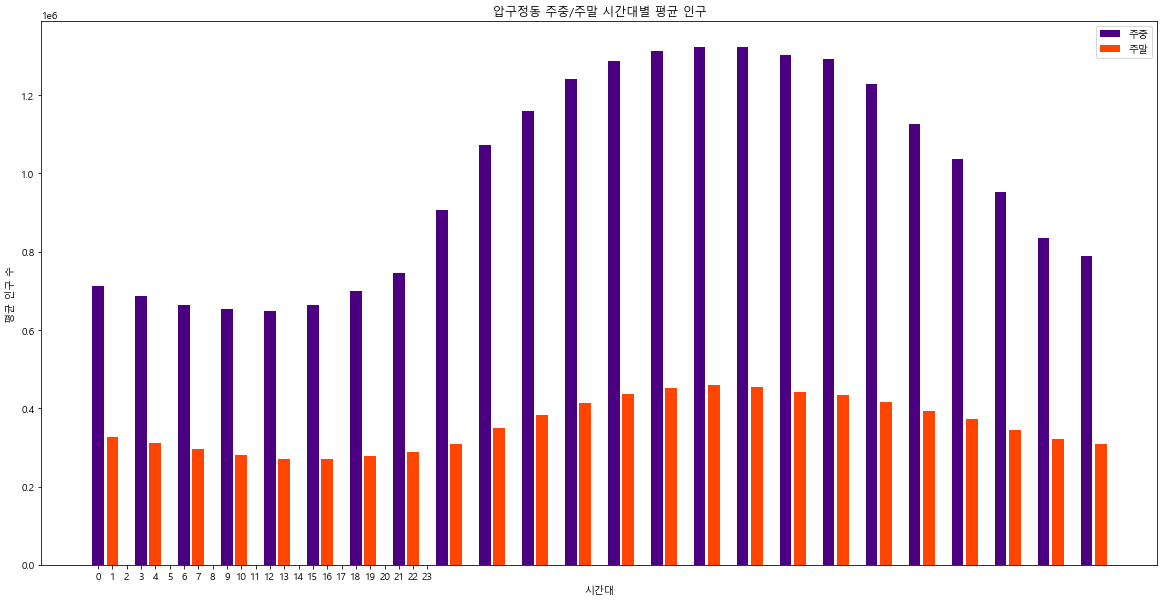

In [10]:
import csv
import matplotlib.pyplot as plt
import datetime

# 데이터 파일 열기 및 읽기
f1=open('LOCAL_PEOPLE_DONG_202205.csv', encoding='utf8')
data=csv.reader(f1)
next(data) #헤더 제거
data=list(data)

# 행정동 코드 파일 열기 및 읽기
f2=open('dong_code.csv', encoding='utf8')
code_data=csv.reader(f2)
next(code_data) #헤더 두 개 제거
next(code_data)
code_data=list(code_data)

# 데이터 파일 (문자열->정수, 실수) 변환
for row in data:
    for i in range(1,32):
        if i<=2: # 인덱스가 2 이하인 경우 정수형으로 변환
            row[i] = int(row[i])
        else: # 인덱스가 2 초과인 경우 실수형으로 변환
            row[i] = float(row[i])

# 행정동 코드 파일 (문자열->정수) 변환
for row in code_data:
    row[1] = int(row[1])

# 행정동 이름과 행정동 코드 연결
dong_name = input('핫플레이스가 위치한 행정동을 입력하세요 >> ')
for row in code_data:
    if row[-1] == dong_name:   # 입력받은 행정동이 코드 파일에 있으면
        dong_code = row[1]     # 해당 동의 코드를 변수에 저장
print(dong_name, '(', dong_code, ')을 분석합니다!')

# 날짜 주중, 주말로 분리
weekday = [0 for i in range(24)]
weekend = [0 for i in range(24)]

for row in data:
    if row[2] == dong_code:
        time, p = row[1], row[3]   # time:시간대 / p:총 생활인구 수
        year, mon, day = int(row[0][:4]), int(row[0][4:6]), int(row[0][6:]) # yyyymmdd -> yyyy mm dd 분리
        
        num = datetime.date(year,mon,day).weekday()  #datetime.date.weekday()를 사용하여 주중, 주말 구분
        if num < 5:     # 결과 0 ~ 4는 주중
            weekday[time] += p  # 주중의 시간대 별 총 생활인구 수 계산
        else:           # 결과 5 ~ 6은 주말
            weekend[time] += p  # 주말의 시간대 별 총 생활인구 수 계산
            
# 그래프 작성
plt.figure(figsize=(20,10))
plt.rc('font',family='Malgun Gothic')
plt.title(dong_name + ' 주중/주말 시간대별 평균 인구')
plt.bar(range(0,72,3), weekday, color='indigo', label='주중')
plt.bar(range(1,73,3), weekend, color='orangered', label='주말')
plt.legend()
plt.xlabel('시간대')
plt.ylabel('평균 인구 수')
plt.xticks(range(24), range(24)) # X축 눈금
plt.show()

핫플레이스가 위치한 행정동을 입력하세요 >> 압구정동
압구정동 ( 11680545 )을 분석합니다!


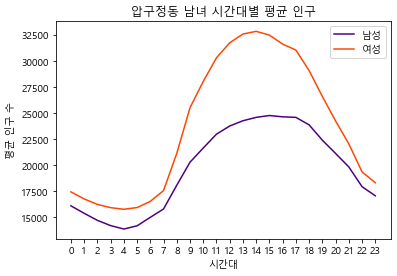

In [11]:
import csv
import matplotlib.pyplot as plt
import datetime

# 데이터 파일 열기 및 읽기
f1=open('LOCAL_PEOPLE_DONG_202205.csv', encoding='utf8')
data=csv.reader(f1)
next(data) #헤더 제거
data=list(data)

# 행정동 코드 파일 열기 및 읽기
f2=open('dong_code.csv', encoding='utf8')
code_data=csv.reader(f2)
next(code_data) #헤더 두 개 제거
next(code_data)
code_data=list(code_data)

# 데이터 파일 (문자열->정수, 실수) 변환
for row in data:
    for i in range(1,32):
        if i<=2: # 인덱스가 2 이하인 경우 정수형으로 변환
            row[i] = int(row[i])
        else: # 인덱스가 2 초과인 경우 실수형으로 변환
            row[i] = float(row[i])

# 행정동 코드 파일 (문자열->정수) 변환
for row in code_data:
    row[1] = int(row[1])

# 행정동 이름과 행정동 코드 연결
dong_name = input('핫플레이스가 위치한 행정동을 입력하세요 >> ')
for row in code_data:
    if row[-1] == dong_name:   # 입력받은 행정동이 코드 파일에 있으면
        dong_code = row[1]     # 해당 동의 코드를 변수에 저장
print(dong_name, '(', dong_code, ')을 분석합니다!')

# 성별 생활인구 합 계산
male = [0 for i in range(24)]
female = [0 for i in range(24)]

for row in data:
    if row[2] == dong_code:
        time = row[1]
        male[time] += sum(row[4:18])     # 남성 인구 합 구하기
        female[time] += sum(row[18:32])  # 여성 인구 합 구하기
male = [m/31 for m in male]
female = [f/31 for f in female]

# 그래프 작성
plt.rc('font',family='Malgun Gothic')
plt.title(dong_name + ' 남녀 시간대별 평균 인구')
plt.plot(male, color='indigo', label='남성')
plt.plot(female, color='orangered', label='여성')
plt.legend()
plt.xlabel('시간대')
plt.ylabel('평균 인구 수')
plt.xticks(range(24), range(24)) # X축 눈금
plt.show()

핫플레이스가 위치한 행정동을 입력하세요 >> 압구정동
압구정동 ( 11680545 )을 분석합니다!


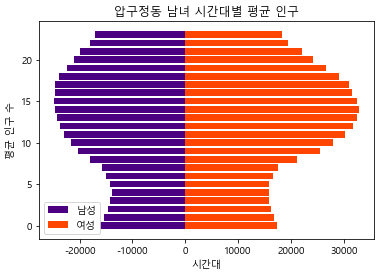

In [16]:
import csv
import matplotlib.pyplot as plt
import matplotlib
import datetime

# 데이터 파일 열기 및 읽기
f1=open('LOCAL_PEOPLE_DONG_202205.csv', encoding='utf8')
data=csv.reader(f1)
next(data) #헤더 제거
data=list(data)

# 행정동 코드 파일 열기 및 읽기
f2=open('dong_code.csv', encoding='utf8')
code_data=csv.reader(f2)
next(code_data) #헤더 두 개 제거
next(code_data)
code_data=list(code_data)

# 데이터 파일 (문자열->정수, 실수) 변환
for row in data:
    for i in range(1,32):
        if i<=2: # 인덱스가 2 이하인 경우 정수형으로 변환
            row[i] = int(row[i])
        else: # 인덱스가 2 초과인 경우 실수형으로 변환
            row[i] = float(row[i])

# 행정동 코드 파일 (문자열->정수) 변환
for row in code_data:
    row[1] = int(row[1])

# 행정동 이름과 행정동 코드 연결
dong_name = input('핫플레이스가 위치한 행정동을 입력하세요 >> ')
for row in code_data:
    if row[-1] == dong_name:   # 입력받은 행정동이 코드 파일에 있으면
        dong_code = row[1]     # 해당 동의 코드를 변수에 저장
print(dong_name, '(', dong_code, ')을 분석합니다!')

# 성별 생활인구 합 계산
male = [0 for i in range(24)]
female = [0 for i in range(24)]

for row in data:
    if row[2] == dong_code:
        time = row[1]
        male[time] += sum(row[4:18])     # 남성 인구 합 구하기
        female[time] += sum(row[18:32])  # 여성 인구 합 구하기
male = [m/31 for m in male]
female = [f/31 for f in female]

male = [-m for m in male]   # 남성 데이터 음수로 변경
matplotlib.rcParams['axes.unicode_minus'] = False  # 그래프 음수 기호 표기

# 그래프 작성
plt.rc('font',family='Malgun Gothic')
plt.title(dong_name + ' 남녀 시간대별 평균 인구')
plt.barh(range(24), male, color='indigo', label='남성')
plt.barh(range(24), female, color='orangered', label='여성')
plt.legend()
plt.xlabel('시간대')
plt.ylabel('평균 인구 수')
plt.show()

핫플레이스가 위치한 행정동을 입력하세요 >> 압구정동
비교할 행정동을 입력하세요 >> 역삼2동


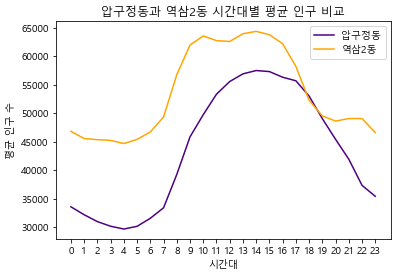

In [17]:
import csv
import matplotlib.pyplot as plt
import datetime

# 데이터 파일 열기 및 읽기
f1=open('LOCAL_PEOPLE_DONG_202205.csv', encoding='utf8')
data=csv.reader(f1)
next(data) #헤더 제거
data=list(data)

# 행정동 코드 파일 열기 및 읽기
f2=open('dong_code.csv', encoding='utf8')
code_data=csv.reader(f2)
next(code_data) #헤더 두 개 제거
next(code_data)
code_data=list(code_data)

# 데이터 파일 (문자열->정수, 실수) 변환
for row in data:
    for i in range(1,32):
        if i<=2: # 인덱스가 2 이하인 경우 정수형으로 변환
            row[i] = int(row[i])
        else: # 인덱스가 2 초과인 경우 실수형으로 변환
            row[i] = float(row[i])

# 행정동 코드 파일 (문자열->정수) 변환
for row in code_data:
    row[1] = int(row[1])

# 행정동 이름과 행정동 코드 연결
dong_name = input('핫플레이스가 위치한 행정동을 입력하세요 >> ')
for row in code_data:
    if row[-1] == dong_name:   # 입력받은 행정동이 코드 파일에 있으면
        dong_code = row[1]     # 해당 동의 코드를 변수에 저장

# 비교할 지역의 행정동 이름과 행정동 코드 연결
dong_name2 = input('비교할 행정동을 입력하세요 >> ')
for row in code_data:
    if row[-1] == dong_name2:   # 입력받은 행정동이 코드 파일에 있으면
        dong_code2 = row[1]     # 해당 동의 코드를 변수에 저장

# 시간대 별 평균 생활인구 수 계산
pop = [0 for i in range(24)]  # 인구 수 리스트 0으로 초기화
pop2 = [0 for i in range(24)] # 비교할 지역의 인구 수 리스트 초기화
for row in data:
    if row[2] == dong_code:
        time, p = row[1], row[3]  # time:시간대 / p:총 생활인구 수
        pop[time] += p            # 각 시간대 별로 생활인구 수가 저장
    elif row[2] == dong_code2:
        time, p = row[1], row[3]  # time:시간대 / p:총 생활인구 수
        pop2[time] += p            # 각 시간대 별로 생활인구 수가 저장
        
pop = [p/31 for p in pop]        # pop을 일수로 나누어 평균 인구 만들기
pop2 = [p/31 for p in pop2]        # pop을 일수로 나누어 평균 인구 만들기

# 그래프 작성
plt.rc('font', family='Malgun Gothic')
plt.title(dong_name + '과 ' + dong_name2 + ' 시간대별 평균 인구 비교')
plt.plot(pop, color='indigo', label=dong_name)
plt.plot(pop2, color='orange', label=dong_name2)
plt.xticks(range(24), range(24))  # X축 눈금
plt.legend()  # 범례
plt.xlabel('시간대')
plt.ylabel('평균 인구 수')
plt.show()